# Documentação do Python em Português: 2 anos depois

O primeiro texto que escrevi no blog sobre o projeto de tradução da documentação do Python para português completou 2 anos. Na época, 17% da documentação tinha sido traduzida, tínhamos apenas 30 pessoas em um grupo no Telegram e nenhum processo automatizado para publicação das traduções. Hoje, após mais de 2 anos e muito progresso, está na hora de uma atualiação sobre o projeto.

Leia o texto na íntegra [aqui](/blog/python-ptbr-cenario-atual/)).

## A comunidade

Qualquer avanço em um projeto tão ambicioso como, traduzir 55,6 mil frases com mais de 1,16 milhão de palavras, não seria possível sem uma comunidade de apoio. Dos pouco mais de 30 pessoas, o grupo aumentou 

Um dos pontos que não mudou desde o primeiro texto, é a sazionalidade na participação das pessoas no projeto. Em períodos próximos a eventos, como a Python Brasil, ou quando alguém da comunidade vai palestrar sobre o projeto em algum evento, há uma maior interação no grupo do Telegram e mais traduções feitas no Transifex. Com o passar do tempo porém, o engajamento diminui.


## As ferramentas

## Os números



In [33]:
import json

import matplotlib.pyplot as plt
import numpy as np

import helper

def is_resource_priority(resource):
    for namespace in helper.REQUIRED_RESOURCES:
        if namespace in resource:
            return True
    return False


def translated(data):
    priorities_not_translated = sum(
        stats['untranslated_entities']
        for resource, stats in data.items()
        if is_resource_priority(resource)
    )
    
    not_translated = sum(stats['untranslated_entities'] for stats in data.values())
    not_translated = not_translated - priorities_not_translated
    
    translated = sum(stats['translated_entities'] for stats in data.values())

    return {
        "translated": translated,
        "priorities_not_translated": priorities_not_translated,
        "not_translated": not_translated,
    }

_2021 = json.load(open("2021-05-09.json"))
_2019 = json.load(open("2019-06-20.json"))

print(translated(_2021))
print(translated(_2019))

{'translated': 22584, 'priorities_not_translated': 19247, 'not_translated': 13514}
{'translated': 9037, 'priorities_not_translated': 26418, 'not_translated': 13580}


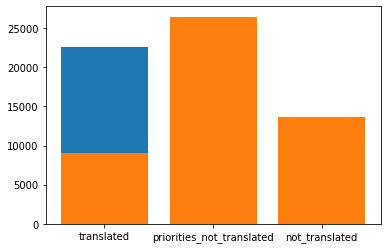

In [38]:
fig, ax = plt.subplots()

data_2021 = translated(_2021)
data_2019 = translated(_2019)

ax.bar(range(len(data_2021)), data_2021.values(), label='2021')
ax.bar(range(len(data_2019)), data_2019.values(), label='2019')

plt.xticks(range(len(data_2021)), list(data_2021.keys()))
plt.show()

## Próximos passos